
# Изучение алгоритма случайного леса.
Ознакомьтесь с основнымиконцепциями и алгоритмом случайного леса.
# Программирование случайного леса в Python.
Напишите код для реализации случайного леса на языке Python. Воспользуйтесь библиотекой scikit-learn.



In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Инициализация модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на обучающем наборе данных
rf_model.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = rf_model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [3]:
# Пример изменения гиперпараметров случайного леса
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5,
random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [5]:
# Важность признаков в случайном лесе
feature_importance = rf_model.feature_importances_
feature_importance

array([0.09987878, 0.02832139, 0.46261016, 0.40918967])

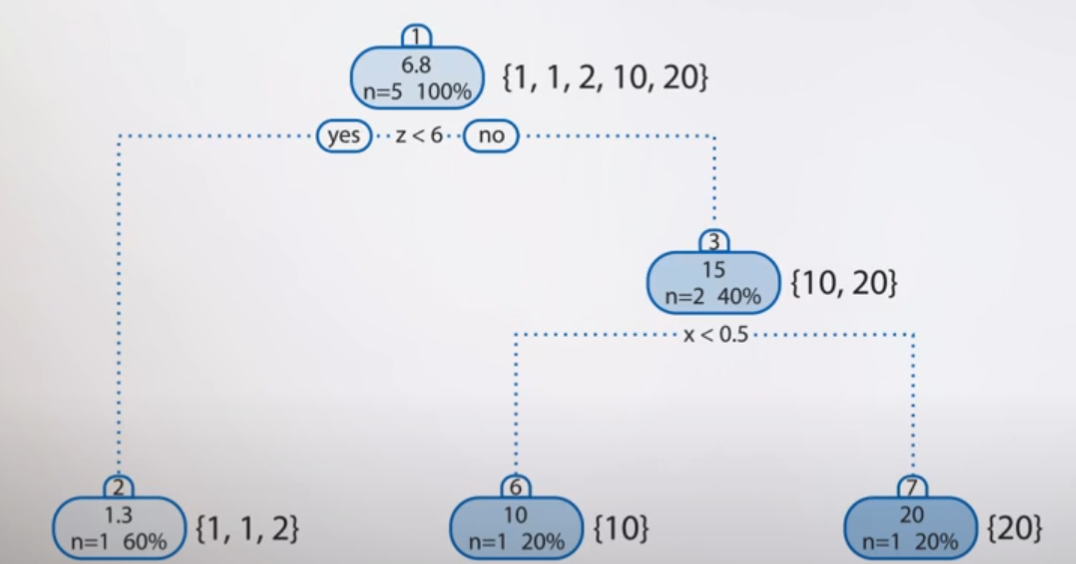

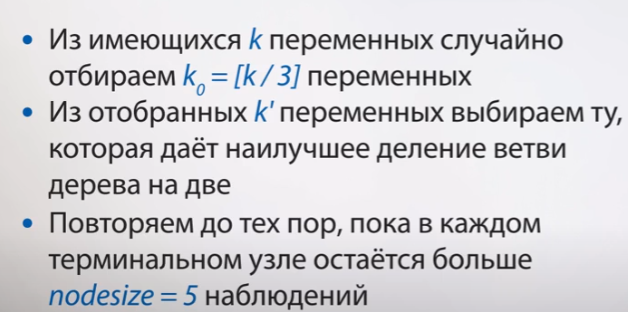

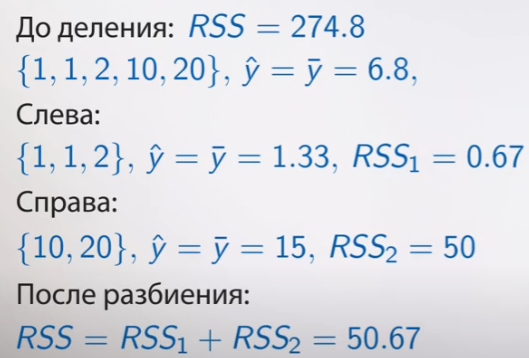

1. Исследуйте влияние различных гиперпараметров на
производительность модели и постройте графики зависимости
производительности от этих параметров.
2. Реализуйте сравнительный анализ случайного леса с другими моделями
машинного обучения на различных наборах данных.

In [10]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# gini = deafult
pipeline = [ RandomForestClassifier(n_estimators=1, max_depth=1),
             RandomForestClassifier(n_estimators=666, max_depth=666),
             RandomForestClassifier(max_features=1),
             RandomForestClassifier(criterion='log_loss'),
             RandomForestClassifier(min_samples_split=40),
            ]

for i in pipeline:
  i.fit(X_train, y_train)

  feature_importance = rf_model.feature_importances_

  y_pred = i.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(i, accuracy, feature_importance)

RandomForestClassifier(max_depth=1, n_estimators=1) 0.7 [0.09987878 0.02832139 0.46261016 0.40918967]
RandomForestClassifier(max_depth=666, n_estimators=666) 1.0 [0.09987878 0.02832139 0.46261016 0.40918967]
RandomForestClassifier(max_features=1) 1.0 [0.09987878 0.02832139 0.46261016 0.40918967]
RandomForestClassifier(criterion='log_loss') 1.0 [0.09987878 0.02832139 0.46261016 0.40918967]
RandomForestClassifier(min_samples_split=40) 1.0 [0.09987878 0.02832139 0.46261016 0.40918967]


# n_estimators
(int, default=100): Количество деревьев в лесу. Увеличение количества деревьев может улучшить производительность модели, но также может увеличить время обучения.

# criterion
({"gini", "entropy", "log_loss"}, default="gini"): Функция для измерения качества разделения. "gini" использует коэффициент Джини, "entropy" использует информационный прирост, "log_loss" использует логистическую функцию потерь.

# max_depth
(int, default=None): Максимальная глубина дерева. Установка ограничения на глубину может помочь предотвратить переобучение.

# min_samples_split
(int or float, default=2): Минимальное количество образцов, необходимых для разделения внутреннего узла. Это помогает контролировать разделение узлов и предотвращать переобучение.

# min_samples_leaf
(int or float, default=1): Минимальное количество образцов, необходимых для нахождения в листовом узле. Это также помогает предотвратить переобучение и сглаживает модель.

# max_features
({"sqrt", "log2", None}, int or float, default="sqrt"): Количество признаков для рассмотрения при поиске лучшего разделения. Это позволяет контролировать сложность модели.

# bootstrap
(bool, default=True): Использование бутстрэп-выборок при построении деревьев. Это позволяет контролировать случайность в модели.

# oob_score
(bool or callable, default=False): Использование out-of-bag образцов для оценки обобщающей способности модели.

# n_jobs
(int, default=None): Количество задач для параллельного выполнения. Это может ускорить процесс обучения.

# random_state
(int, RandomState instance or None, default=None): Контроль случайности при построении деревьев.

In [15]:
from sklearn import datasets

datasets = [datasets.load_wine(), datasets.load_breast_cancer()]
for i in datasets:
    X = i.data
    y = i.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=300, max_depth=300)

    clf.fit(X_train, y_train)

    feature_importance = rf_model.feature_importances_

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, feature_importance)
    print(i.DESCR.split('\n', 1)[0])

1.0 [0.09987878 0.02832139 0.46261016 0.40918967]
.. _wine_dataset:
0.9649122807017544 [0.09987878 0.02832139 0.46261016 0.40918967]
.. _breast_cancer_dataset:
